# Notebook Basics

> The Jupyter Notebook is a web-based interactive computing platform that allows users to author data- and code-driven narratives that combine live code, > equations, narrative text, visualizations, interactive dashboards and other media.

Jupyter Notebooks allow us to work on python code interactively. 
We use two types of cells in a Jupyter Notebook: The **Code cells** contain snippets of our python code. Each code cell can be run independently. This makes it possible to modify and run isolated code snippets without running the entire code every time. 
The **Markdown cells** are text cells. They can be used to comment on the code.

You may select a cell by clicking on it. The type of a selected cell is now mentioned in the head line. By clicking on this you can change the type of the cell:

<div><img src="images/1.png" width="700"/></div>

On the right side of the selected cell there are some useful icons to delete, move or copy the cell or to add a new cell above or below.

## Select a Kernel ...

In order to work with the NLP pipeline Pipy we need to use a Python environment that is configured for this purpose. Therefore, before we can start running code cells we need to select our Kernel. You can do so by clicking on the button on the right side of the head line (it might have a predefined kernel or "no kernel") and choose the environment "DHd 2023 NLP Workshop" for our workshop. Do not use the blank Python 3 environment.


<div><img src="images/2.png" width="800"/></div>


## Running and editing cells
You can run a selected cell using this button in the head line: 

You can also run all the cells within in the notebook using this button:  

Now, try and run the following code:

In [1]:
print('Hey I am a python command in a Jupyter cell and I say: "Hello World!" ') # This is a comment

Hey I am a python command in a Jupyter cell and I say: "Hello World!" 


By clicking in the cell (double click for markdown cells) you can change into edit mode. It is now possible to edit the code or text in the cell.

Try and edit the first code cell changing the string that is to be printed out. Then run the cell again and see if it worked.

## Hotkeys
There are some useful key combinations (hotkeys)
- <kbd>Escape</kbd> changes from edit mode to command mode. You can now use the arrow keys to navigate from cell to cell. By holding <kbd>SHIFT</kbd> while using the arrow keys you can select more than one cell.
- <kbd>CTRL</kbd> + <kbd>Enter</kbd> run selected cells
- <kbd>ENTER</kbd> changes from command mode to edit mode. It is now possible to edit the selected cell. You can also get into the edit mode with a double click on the cell.

# Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. It allows you to create customised natural-language-processing pipelines. These pipelines consist of pipeline components, which enrich an input text with linguistic (and potentially other) information, such as the text's grammatical structure. Some components are provided by spaCy and others can be implemented by the user.

## Loading pipelines

After installing and importing the pipeline, you can load it via `spacy.load` This will return a language object containing components and data needed to process text. We usually call this object `nlp`. 
The default components are:
- `tokenizer` segments the text into tokens 
- `tagger` adds part-of-speech tags to words
- `parser` adds syntactic dependency trees to sentences
- `ner` performs named entity recognition

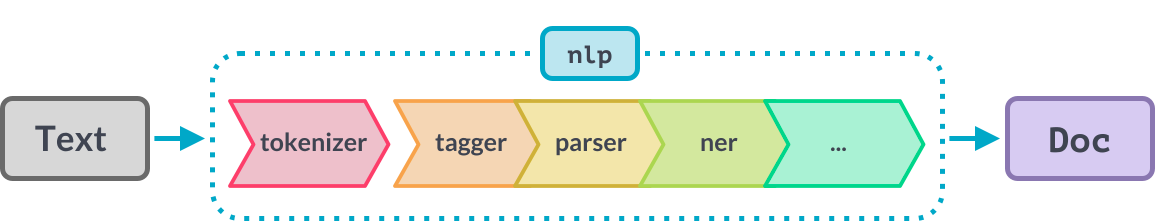


In [2]:
import spacy
from spacy import displacy

In [3]:
# create pipeline object
nlp = spacy.load("de_core_news_lg")
# show components currently part of the pipeline
print(nlp.pipe_names)

['tagger', 'parser', 'ner']



Calling the `nlp` object on a string of text will return a processed document (saved in the variable `doc` here):

In [4]:
text = "„Ach“, sagte die Maus, „die Welt wird enger mit jedem Tag. Zuerst war sie so breit, daß ich Angst hatte, ich lief weiter und war glücklich, daß ich endlich rechts und links in der Ferne Mauern sah, aber diese langen Mauern eilen so schnell aufeinander zu, daß ich schon im letzten Zimmer bin, und dort im Winkel steht die Falle, in die ich laufe.“ – „Du mußt nur die Laufrichtung ändern“, sagte die Katze und fraß sie."
doc = nlp(text)

# Objects

There are three levels in a text that can be individually called by spaCy objects: 
- `Doc` the complete text/document that was piped 
- `Token` individual word/token
- `Span` any sequence of words/tokens

## Doc object

The `Doc` object contains the complete document that was piped:

In [5]:
print(doc)

„Ach“, sagte die Maus, „die Welt wird enger mit jedem Tag. Zuerst war sie so breit, daß ich Angst hatte, ich lief weiter und war glücklich, daß ich endlich rechts und links in der Ferne Mauern sah, aber diese langen Mauern eilen so schnell aufeinander zu, daß ich schon im letzten Zimmer bin, und dort im Winkel steht die Falle, in die ich laufe.“ – „Du mußt nur die Laufrichtung ändern“, sagte die Katze und fraß sie.


What is printed out here seems like plain text, but it is the string representation of the `Doc` object. `doc` has the type `Doc`:

In [6]:
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


## Token object

A document consists of tokens. You can access each token via their position:

In [7]:
print(doc[10])

Welt


 A `Token` object stores individual tokens — i.e. a word, punctuation symbol, whitespace, etc.

In [8]:
print(type(doc[10]))

<class 'spacy.tokens.token.Token'>


Tokens can have attributes assigned to them, such as part of speech, which is assigned by the `tagger` component. These attributes may be given out for any chosen token in the document:

In [9]:
print(doc[10].pos_)

NOUN


## Span object

`Span` is a slice from a `Doc` object

`doc[start : end]` creates a `Span` object based on the start and end tokens (where `end` is not included)

In [10]:
print(doc[0:10])

„Ach“, sagte die Maus, „die


In [11]:
print(type(doc[0:10]))

<class 'spacy.tokens.span.Span'>


A document contains sentences. It is possible to iterate over the sentences if sentence boundaries have been set on the document, which is a default in spaCy. The object type of a sentence is `Span`.

In [12]:
for sent in doc.sents:
    print(sent)

„Ach“, sagte die Maus, „die Welt wird enger mit jedem Tag.
Zuerst war sie so breit, daß ich Angst hatte, ich lief weiter und war glücklich, daß ich endlich rechts und links in der Ferne Mauern sah, aber diese langen Mauern eilen so schnell aufeinander zu, daß ich schon im letzten Zimmer bin, und dort im Winkel steht die Falle, in die ich laufe.“
– „Du mußt nur die Laufrichtung ändern“, sagte die Katze und fraß sie.


It is possible to extract individual sentences from the list. The count starts with 0, so the first sentence can be extracted like this:

In [13]:
sent_1 = list(doc.sents)[0]
print(sent_1)

„Ach“, sagte die Maus, „die Welt wird enger mit jedem Tag.


In [14]:
print(type(sent_1))

<class 'spacy.tokens.span.Span'>


spaCy's provides a way to visualize the syntactic structure of a sentence called `displacy`. 

Arrows point from children to heads, and are labelled with their relation type.

In [15]:
displacy.render(sent_1, style="dep", options={"collapse_punct":False}) 